Шаги исследования:
1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Подготовка данных о пользователе](#user)
4. [Анализ данных пользователя](#analisys)
5. [Проверка гипотез](#hypothesis)
6. [Общий вывод](#output)

<div style="border:solid blue 2px; padding: 20px"> 
<a id="start">Шаг 1. Открываем файл с данными и изучаем общую информациюх</a>
</div>

In [1]:
#Шаг 1. Открываемфайл с данными и изучим общую информацию
import math
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import scipy.stats as st

d_calls    = pd.read_csv("/datasets/calls.csv", sep=",")
d_internet = pd.read_csv("/datasets/internet.csv", sep=",")
d_messages = pd.read_csv("/datasets/messages.csv", sep=",")
d_tariffs  = pd.read_csv("/datasets/tariffs.csv", sep=",")
d_users    = pd.read_csv("/datasets/users.csv", sep=",")
#1. Calls
print('1. Calls')
display(d_calls.head(5))
display(d_calls.describe())
d_calls.info()
#2. Internet
print('2. Internet')
display(d_internet.head(5))
display(d_internet.describe())
d_internet.info()
#3. Messages
print('3. Messages')
display(d_messages.head(5))
display(d_messages.describe())
d_messages.info()
#4. Tariffs
print('4. Tariffs')
display(d_tariffs.head(5))
display(d_tariffs.describe())
d_tariffs.info()
#5. Users
print('5. Users')
display(d_users.head(5))
display(d_users.describe())
d_users.info()

1. Calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
2. Internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
3. Messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
4. Tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
5. Users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<div class="alert alert-info">
<b>Вывод: </b> 
    
Можем 
    
1. уточнить форматы дат в таблицах

2. округлить мегабайты трафика интернет
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<a id="preprocessing">
    Шаг 2. Предобработка данных
</a>
        
    Приводим данные к нужным типам;
    Исправляем ошибки в данных.
</div>

In [2]:
#Шаг 2. Предобработка данных
#1). Преобразование дат, добавление месяца
###приводим в формат datetime
d_calls['call_date']       = pd.to_datetime(d_calls['call_date']
                                            , format='%Y-%m-%d')
d_internet['session_date'] = pd.to_datetime(d_internet['session_date']
                                            , format='%Y-%m-%d')
d_messages['message_date'] = pd.to_datetime(d_messages['message_date']
                                            , format='%Y-%m-%d')
d_users['reg_date']        = pd.to_datetime(d_users['reg_date']
                                            , format='%Y-%m-%d')
d_users['churn_date']      = pd.to_datetime(d_users['churn_date']
                                            , format='%Y-%m-%d')
###добавляем месяц
d_calls['month'] = pd.to_datetime(d_calls['call_date']).dt.month
###или вот так  d_calls['month_number'] = pd.DatetimeIndex(d_calls['call_date']).month
d_internet['month'] = pd.to_datetime(d_internet['session_date']).dt.month
d_messages['month'] = pd.to_datetime(d_messages['message_date']).dt.month
d_users['reg_month']    = pd.to_datetime(d_users['reg_date']).dt.month
d_users['churn_month']    = pd.to_datetime(d_users['churn_date']).dt.month
#2). Округляем мегабайты трафика интернет
#d_calls['duration'] = math.ceil(d_calls['duration']).astype('int')
def ceil_value(value):
    return math.ceil(value)
d_calls['duration'] = d_calls['duration'].apply(ceil_value).astype('int')
d_internet['mb_used'] = d_internet['mb_used'].apply(ceil_value).astype('int')
#1. Calls
print('1. Calls')
display(d_calls.head(5))
d_calls.info()
#2. Internet
print('2. Internet')
display(d_internet.head(5))
d_internet.info()
#3. Messages
print('3. Messages')
display(d_messages.head(5))
d_messages.info()
#4. Tariffs
print('4. Tariffs')
display(d_tariffs.head(5))
d_tariffs.info()
#5. Users
print('5. Users')
display(d_users.head(5))
d_users.info()

1. Calls


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB
2. Internet


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB
3. Messages


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB
4. Tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
5. Users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,NaN
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,NaN
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
reg_month      500 non-null int64
churn_month    38 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


<div style="border:solid blue 2px; padding: 20px"> 
<a id="user">
    Шаг 3. Подготовка данных о пользователе
</a>
</div>

In [21]:
#Посчитайте для каждого пользователя:
#1. количество сделанных звонков и израсходованных минут разговора по месяцам;
calls_by_month = d_calls.pivot_table(index=['user_id', 'month']
                                     , values='duration'
                                     , aggfunc=['sum', 'count']
                                    )
calls_by_month.sort_values(by=['user_id'], ascending=False).reset_index()
calls_by_month.columns = ['calls_duration', 'calls_amount']
display(calls_by_month.head(5))
###Заменить сводную табицу на обычную
calls_by_month = calls_by_month.reset_index()
display(calls_by_month.head(5))
#calls_by_month.columns = calls_by_month.columns.droplevel(0)
#сalls_by_month = calls_by_month.reset_index().rename_axis(None, axis=1)
#2. количество отправленных сообщений по месяцам;
messages_by_month = d_messages.pivot_table(index=['user_id', 'month']
                                           , values='id'
                                           , aggfunc=['count']
                                          )
messages_by_month.sort_values(by=['user_id'], ascending=False).reset_index()
messages_by_month.columns = ['messages']
messages_by_month['messages'] = messages_by_month['messages'].astype('int')
messages_by_month = messages_by_month.reset_index()
#3. объем израсходованного интернет-трафика по месяцам;
internet_by_month = d_internet.pivot_table(index=['user_id', 'month']
                                           , values='mb_used'
                                           , aggfunc=['sum']
                                          )
internet_by_month.sort_values(by=['user_id'], ascending=False).reset_index()
internet_by_month.columns = ['mb_used']
internet_by_month = internet_by_month.reset_index()
#4. помесячную выручку с каждого пользователя
#--smart-----------------------------------
#--messages_included = 50,--mb_per_month_included = 15360--minutes_included = 500
#--rub_monthly_fee = 550,--rub_per_gb = 200,--rub_per_message =3,--rub_per_minute = 3
#for row in all_by_month

all_by_month = calls_by_month.merge(messages_by_month, on=['user_id', 'month'], how='left')
all_by_month.info()
all_by_month = all_by_month.merge(internet_by_month, on=['user_id', 'month'], how='left')
all_by_month = all_by_month.merge(d_users, on=['user_id'], how='left')
all_by_month.info()
all_by_month = all_by_month.merge(d_tariffs, left_on=['tariff'], right_on=['tariff_name'], how='left')
display(all_by_month.head(5))
display('all_by_month',all_by_month.count())
display('internet_by_month',internet_by_month.count())
display('messages_by_month',messages_by_month.count())

calls_duration  calls_amount
user_id month                              
1000    5                 159            22
        6                 172            43
        7                 340            47
        8                 408            52
        9                 466            58

,user_id,month,calls_duration,calls_amount
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 5 columns):
user_id           3174 non-null int64
month             3174 non-null int64
calls_duration    3174 non-null int64
calls_amount      3174 non-null int64
messages          2678 non-null float64
dtypes: float64(1), int64(4)
memory usage: 148.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 15 columns):
user_id           3174 non-null int64
month             3174 non-null int64
calls_duration    3174 non-null int64
calls_amount      3174 non-null int64
messages          2678 non-null float64
mb_used           3163 non-null float64
age               3174 non-null int64
churn_date        187 non-null datetime64[ns]
city              3174 non-null object
first_name        3174 non-null object
last_name         3174 non-null object
reg_date          3174 non-null datetime64[ns]
tariff            3174 non-null object
reg_month         3174 n

,user_id,month,calls_duration,calls_amount,messages,mb_used,age,churn_date,city,first_name,...,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,22,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172,43,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340,47,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408,52,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466,58,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,ultra


'all_by_month'

user_id                  3174
month                    3174
calls_duration           3174
calls_amount             3174
messages                 2678
mb_used                  3163
age                      3174
churn_date                187
city                     3174
first_name               3174
last_name                3174
reg_date                 3174
tariff                   3174
reg_month                3174
churn_month               187
messages_included        3174
mb_per_month_included    3174
minutes_included         3174
rub_monthly_fee          3174
rub_per_gb               3174
rub_per_message          3174
rub_per_minute           3174
tariff_name              3174
dtype: int64

'internet_by_month'

user_id    3203
month      3203
mb_used    3203
dtype: int64

'messages_by_month'

user_id     2717
month       2717
messages    2717
dtype: int64

<div style="border:solid blue 2px; padding: 20px"> 
<a id="analisys">
    Шаг 4. Анализ данных пользователя
</a>
</div>

In [4]:
#Посчитаем выручку от сообщений/интернета/звонков
###вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
###остаток умножьте на значение из тарифного плана; 
###прибавьте абонентскую плату, соответствующую тарифному плану.

def users_by_month(row):   
    if row['messages'] > row['messages_included']:
        revenue_message = (row['messages']-row['messages_included'])*row['rub_per_message']
    else:
        revenue_message = 0
    if row['mb_used'] > row['mb_per_month_included']:
        revenue_internet = math.ceil((row['mb_used']-row['mb_per_month_included'])/1024)*row['rub_per_gb']
    else:
        revenue_internet = 0
    if row['calls_duration'] > row['minutes_included']:
        revenue_calls = (row['calls_duration']-row['minutes_included'])*row['rub_per_minute']
    else:
        revenue_calls = 0
    total_revenue = revenue_message + revenue_internet + revenue_calls + row['rub_monthly_fee']
    return total_revenue

all_by_month['total_revenue'] = all_by_month.apply(users_by_month, axis=1)
display(all_by_month.head(20))
all_by_month.info()

,user_id,month,calls_duration,calls_amount,messages,mb_used,age,churn_date,city,first_name,...,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_revenue
0,1000,5,159,22,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6,172,43,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7,340,47,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8,408,52,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9,466,58,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
5,1000,10,350,57,73.0,14717.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
6,1000,11,338,43,58.0,14768.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
7,1000,12,333,46,70.0,9827.0,52,NaT,Краснодар,Рафаил,...,NaN,1000,30720,3000,1950,150,1,1,ultra,1950.0
8,1001,11,430,59,NaN,18452.0,41,NaT,Москва,Иван,...,NaN,50,15360,500,550,200,3,3,smart,1350.0
9,1001,12,414,63,NaN,14053.0,41,NaT,Москва,Иван,...,NaN,50,15360,500,550,200,3,3,smart,550.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 24 columns):
user_id                  3174 non-null int64
month                    3174 non-null int64
calls_duration           3174 non-null int64
calls_amount             3174 non-null int64
messages                 2678 non-null float64
mb_used                  3163 non-null float64
age                      3174 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3174 non-null object
first_name               3174 non-null object
last_name                3174 non-null object
reg_date                 3174 non-null datetime64[ns]
tariff                   3174 non-null object
reg_month                3174 non-null int64
churn_month              187 non-null float64
messages_included        3174 non-null int64
mb_per_month_included    3174 non-null int64
minutes_included         3174 non-null int64
rub_monthly_fee          3174 non-null int64
rub_per_gb  

In [5]:
#Шаг 3. Проанализируем данные #Опишем поведение клиентов оператора, исходя из выборки. 
#Сколько минут разговора, сколько сообщений и какой объём интернет-трафика 
#требуется пользователям каждого тарифа в месяц? 
#Добавим информацию о сообщениях, интернете и звонках, используемых сверх лимита
def over_limit(row, column1, column2):   
    if row[column1] > row[column2]:
        over_limit_ = row[column1]-row[column2]
    else:
        over_limit_ = 0
    return over_limit_
all_by_month['over_limit_messages'] = all_by_month.apply(over_limit
                                                         , axis=1
                                                         , column1 = 'messages'
                                                         , column2 ='messages_included')
all_by_month['over_limit_internet'] = all_by_month.apply(over_limit
                                                         , axis=1
                                                         , column1 = 'mb_used'
                                                         , column2 ='mb_per_month_included')
all_by_month['over_limit_calls'] = all_by_month.apply(over_limit
                                                         , axis=1
                                                         , column1 = 'calls_duration'
                                                         , column2 ='minutes_included')
display(all_by_month.head(20))

,user_id,month,calls_duration,calls_amount,messages,mb_used,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_revenue,over_limit_messages,over_limit_internet,over_limit_calls
0,1000,5,159,22,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
1,1000,6,172,43,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
2,1000,7,340,47,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
3,1000,8,408,52,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
4,1000,9,466,58,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
5,1000,10,350,57,73.0,14717.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
6,1000,11,338,43,58.0,14768.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
7,1000,12,333,46,70.0,9827.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,1950.0,0.0,0.0,0
8,1001,11,430,59,NaN,18452.0,41,NaT,Москва,Иван,...,500,550,200,3,3,smart,1350.0,0.0,3092.0,0
9,1001,12,414,63,NaN,14053.0,41,NaT,Москва,Иван,...,500,550,200,3,3,smart,550.0,0.0,0.0,0


In [6]:
#Посчитаем среднее количество, дисперсию и стандартное отклонение. 
smart = all_by_month.query('tariff == "smart"')
print('-----------------------')
print('По тарифу SMART, в среднем за месяц:')
print('-----------------------')
print('Минут разговора:', round(smart['calls_duration'].describe()['mean']))
print('Сообщений:', round(smart['messages'].describe()['mean']))
print('Мегабайт интернета:', round(smart['mb_used'].describe()['mean']))
print('')
print('Стандартное отклонение минут разговора:', round(smart['calls_duration'].describe()['std']))
print('Стандартное отклонение сообщений:', round(smart['messages'].describe().describe()['std']))
print('Стандартное отклонение мегабайт интернета:', round(smart['mb_used'].describe()['std']))
print('')
print('Дисперсия минут разговора:', round(smart['calls_duration'].describe()['std']** 2))
print('Дисперсия сообщений:', round(smart['messages'].describe().describe()['std']** 2))
print('Дисперсия мегабайт интернета:', round(smart['mb_used'].describe()['std']**2))
print('')
print('Среднее превышение лимита разговора:', round(smart['over_limit_calls'].describe()['mean']))
print('Среднее превышение лимита сообщений:', round(smart['over_limit_messages'].describe()['mean']))
print('Среднее превышение лимита интернета (в мб):', round(smart['over_limit_internet'].describe()['mean']))
print('')

-----------------------
По тарифу SMART, в среднем за месяц:
-----------------------
Минут разговора: 419
Сообщений: 39
Мегабайт интернета: 16237

Стандартное отклонение минут разговора: 189
Стандартное отклонение сообщений: 663
Стандартное отклонение мегабайт интернета: 5875

Дисперсия минут разговора: 35844
Дисперсия сообщений: 439387
Дисперсия мегабайт интернета: 34510889

Среднее превышение лимита разговора: 42
Среднее превышение лимита сообщений: 6
Среднее превышение лимита интернета (в мб): 2773



In [7]:
ultra = all_by_month.query('tariff == "ultra"')
print('-----------------------')
print('По тарифу ULTRA, в среднем за месяц:')
print('-----------------------')
print('Минут разговора:', round(ultra['calls_duration'].describe()['mean']))
print('Сообщений:', round(ultra['messages'].describe()['mean']))
print('Мегабайт интернета:', round(ultra['mb_used'].describe()['mean']))
print('')
print('Стандартное отклонение минут разговора:', round(ultra['calls_duration'].describe()['std']))
print('Стандартное отклонение сообщений:', round(ultra['messages'].describe().describe()['std']))
print('Стандартное отклонение мегабайт интернета:', round(ultra['mb_used'].describe()['std']))
print('')
print('Дисперсия минут разговора:', round(ultra['calls_duration'].describe()['std']** 2))
print('Дисперсия сообщений:', round(ultra['messages'].describe().describe()['std']** 2))
print('Дисперсия мегабайт интернета:', round(ultra['mb_used'].describe()['std']**2))
print('')
print('Среднее превышение лимита разговора:', round(ultra['over_limit_calls'].describe()['mean']))
print('Среднее превышение лимита сообщений:', round(ultra['over_limit_messages'].describe()['mean']))
print('Среднее превышение лимита интернета (в мб):', round(ultra['over_limit_internet'].describe()['mean']))
print('')

#В тарифе ULTRA люди не превышают лимит разговора и сообщений, 
#превышение лимита интернета в среднем ниже, чем в SMART.

-----------------------
По тарифу ULTRA, в среднем за месяц:
-----------------------
Минут разговора: 545
Сообщений: 61
Мегабайт интернета: 19688

Стандартное отклонение минут разговора: 307
Стандартное отклонение сообщений: 254
Стандартное отклонение мегабайт интернета: 9988

Дисперсия минут разговора: 94203
Дисперсия сообщений: 64264
Дисперсия мегабайт интернета: 99750820

Среднее превышение лимита разговора: 0
Среднее превышение лимита сообщений: 0
Среднее превышение лимита интернета (в мб): 761



<div style="border:solid blue 2px; padding: 20px"> 
Вывод:
    
В тарифе ULTRA люди не превышают лимит разговора и сообщений, превышение лимита интернета в среднем ниже, чем в SMART.
</div>   

-----------
Тариф SMART
-----------


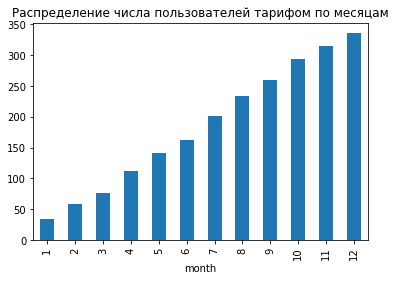

-----------
Тариф ULTRA
-----------


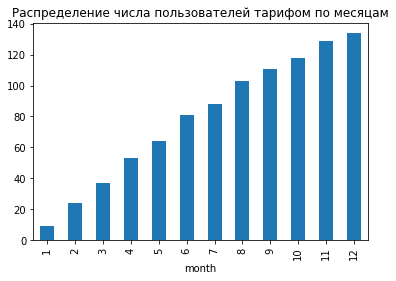

In [12]:
#Посмотим на распределение числа пользователей по тарифам.
print('-----------')
print('Тариф SMART')
print('-----------')
smart.groupby('month')['user_id'].count().plot(x='month',y='user_id',kind='bar') 
plt.title('Распределение числа пользователей тарифом по месяцам')
plt.show()
    
print('-----------')
print('Тариф ULTRA')
print('-----------')
ultra.groupby('month')['user_id'].count().plot(x='month',y='user_id',kind='bar') 
plt.title('Распределение числа пользователей тарифом по месяцам')
plt.show()

#число пользователей по тарифам к концу года возрастает

<div style="border:solid blue 2px; padding: 20px"> 
Вывод:
    
Число пользователей по тарифам к концу года возрастает
</div>

-----------
Тариф SMART
-----------


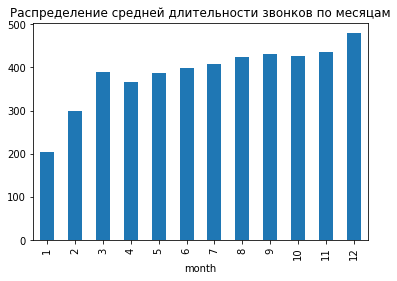

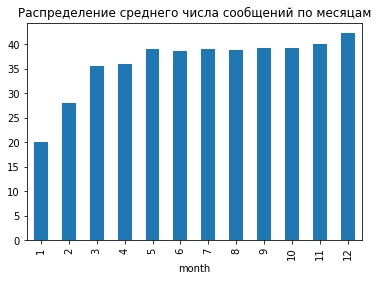

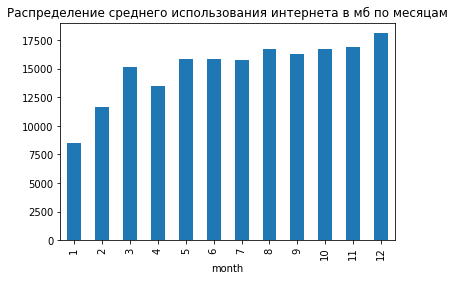

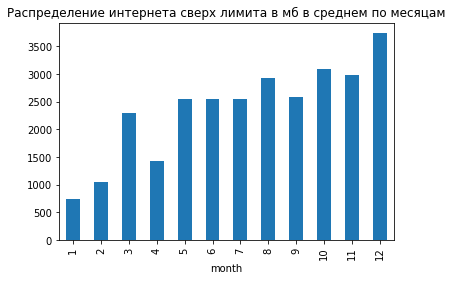

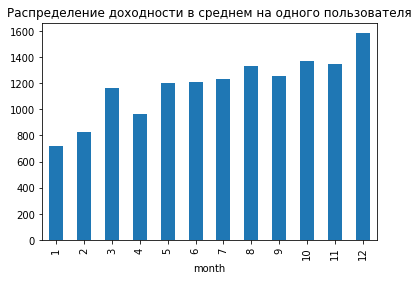

-----------
Тариф ULTRA
-----------


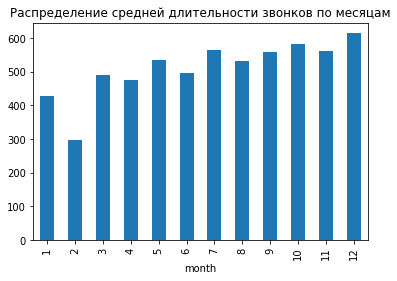

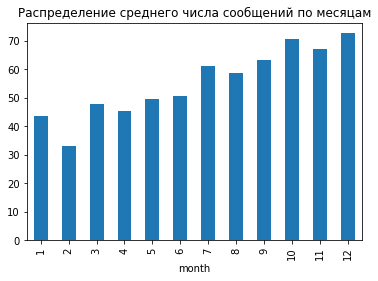

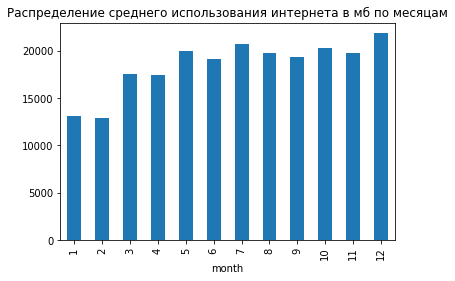

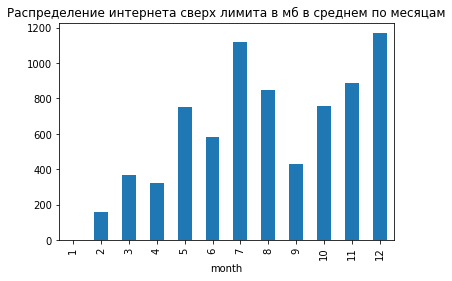

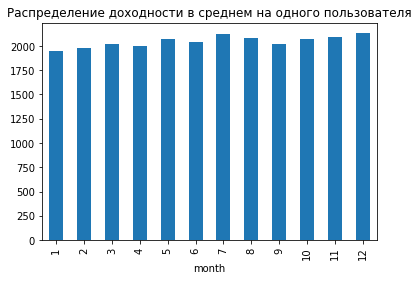

In [13]:
#Постройте гистограммы. Опишем распределения.

columns = ['calls_duration'
           , 'messages'
           , 'mb_used'
           ,'over_limit_internet'
           ,'total_revenue'
          ]
print('-----------')
print('Тариф SMART')
print('-----------')
#smart.groupby('month')['calls_duration'].mean().plot(x='month',y='calls_duration',kind='bar')
for i in columns:
    smart.groupby('month')[i].mean().plot(x='month',y=i,kind='bar') 
    if i == 'calls_duration':
        plt.title('Распределение средней длительности звонков по месяцам')
    if i == 'messages':
        plt.title('Распределение среднего числа сообщений по месяцам')
    if i == 'mb_used':
        plt.title('Распределение среднего использования интернета в мб по месяцам') 
    if i == 'over_limit_internet':
        plt.title('Распределение интернета сверх лимита в мб в среднем по месяцам') 
    if i == 'total_revenue':
        plt.title('Распределение доходности в среднем на одного пользователя') 
    plt.show()
    
print('-----------')
print('Тариф ULTRA')
print('-----------')
#smart.groupby('month')['calls_duration'].mean().plot(x='month',y='calls_duration',kind='bar')
for i in columns:
    ultra.groupby('month')[i].mean().plot(x='month',y=i,kind='bar') 
    if i == 'calls_duration':
        plt.title('Распределение средней длительности звонков по месяцам')
    if i == 'messages':
        plt.title('Распределение среднего числа сообщений по месяцам')
    if i == 'mb_used':
        plt.title('Распределение среднего использования интернета в мб по месяцам')      
    if i == 'over_limit_internet':
        plt.title('Распределение интернета сверх лимита в мб в среднем по месяцам') 
    if i == 'total_revenue':
        plt.title('Распределение доходности в среднем на одного пользователя') 
    plt.show()
#Клиенты наименее активно пользуются тарифом "SMART" в январе,
#а тарифом "ULTRA" в феврале.
#К декабрю активность использования обох тарифов возрастает.
#Средняя доходность по тарифу "SMART" возрастает к концу года,
#в то время как по тарифу "ULTRA" в среднем на пользователя в течение года не меняется.

<div style="border:solid blue 2px; padding: 20px"> 
Вывод:
    
Клиенты наименее активно пользуются тарифом "SMART" в январе, а тарифом "ULTRA" в феврале.
К декабрю активность использования обох тарифов возрастает.
Средняя доходность по тарифу "SMART" возрастает к концу года, в то время как по тарифу "ULTRA" в среднем на пользователя в течение года не меняется.
</div>

-----------
Тариф SMART
-----------
user_id                  2223
month                    2223
calls_duration           2223
calls_amount             2223
messages                 1916
mb_used                  2222
age                      2223
churn_date                111
city                     2223
first_name               2223
last_name                2223
reg_date                 2223
tariff                   2223
reg_month                2223
churn_month               111
messages_included        2223
mb_per_month_included    2223
minutes_included         2223
rub_monthly_fee          2223
rub_per_gb               2223
rub_per_message          2223
rub_per_minute           2223
tariff_name              2223
total_revenue            2223
over_limit_messages      2223
over_limit_internet      2223
over_limit_calls         2223
dtype: int64
Минимальная доходность - 550
Максимальная доходность - 28551


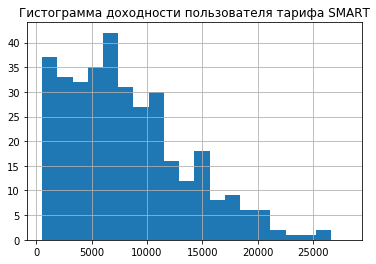

-----------
Тариф ULTRA
-----------
Минимальная доходность - 1950
Максимальная доходность - 32400


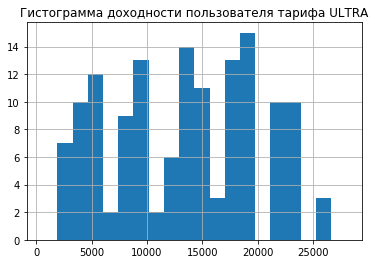

In [19]:
#Посмотрим на распределение среднего дохода на одного пользователя по тарифам
print('-----------')
print('Тариф SMART')
print('-----------')
smart_user = smart.groupby('user_id')['total_revenue'].sum()
smart_user = smart_user.reset_index()
print('Минимальная доходность -', round(smart_user['total_revenue'].min()))
print('Максимальная доходность -', round(smart_user['total_revenue'].max()))
smart_user['total_revenue'].hist(bins=20,range=(550,28000), label = 'Доходность пользователя SMART')
plt.title('Гистограмма доходности пользователя тарифа SMART')
plt.show()
print('-----------')
print('Тариф ULTRA')
print('-----------')
ultra_user = ultra.groupby('user_id')['total_revenue'].sum()
ultra_user = ultra_user.reset_index()
print('Минимальная доходность -', round(ultra_user['total_revenue'].min()))
print('Максимальная доходность -', round(ultra_user['total_revenue'].max()))
ultra_user['total_revenue'].hist(bins=20,range=(550,28000), label = 'Доходность пользователя ULTRA')
plt.title('Гистограмма доходности пользователя тарифа ULTRA')
plt.show()

<div style="border:solid blue 2px; padding: 20px"> 
<a id = "hypothesis">
    Шаг 5: Проверка гипотез.
</a>
</div>

In [15]:
#1) Проверим гипотезу "Распределения обучающей и тестовой выборки равны"

#Пороговое значение alpha - 0.05
alpha = 0.05 #если p-value окажется меньше него - отвергнем гипотезу
#Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. 
#Альтернативной гипотезой - cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
#Использую метод scipy.stats.ttest_ind (array1, array2, equal_var = False)
tariff_results = st.ttest_ind(smart_user['total_revenue'], ultra_user['total_revenue'],equal_var = False)
print('p-значение:', tariff_results.pvalue)

#p-значение очень мало, таким образом средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

p-значение: 2.9438131414485496e-15


<div style="border:solid blue 2px; padding: 20px"> 
Вывод:
    
p-значение очень мало, таким образом средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
</div>    

In [16]:
#2) Проверим гипотезу "Cредняя выручка пользователи из Москвы отличается 
#от выручки пользователей из других регионов."
moscow = all_by_month.query('city == "Москва"')
region = all_by_month.query('city != "Москва"')
moscow_user = moscow.groupby('user_id')['total_revenue'].sum()
moscow_user = moscow_user.reset_index()
region_user = region.groupby('user_id')['total_revenue'].sum()
region_user = region_user.reset_index()

moscow_results = st.ttest_ind(moscow_user['total_revenue'], region_user['total_revenue'],equal_var = False)
print('p-значение:', moscow_results.pvalue)
#p-значение велико, таким образом средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов.
#Можно также проверять нормальность распределения,например, тестом Шапиро-Уилка https://www.machinelearningmastery.ru/a-gentle-introduction-to-normality-tests-in-python/

p-значение: 0.6036045963856267


<div style="border:solid blue 2px; padding: 20px"> 
Вывод:
    
p-значение велико, таким образом средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов.
</div>

<div class="alert alert-info">
<a id = "output">
<b>Общий вывод: </b> 
</a>
    
1. Cредняя выручка от пользователей тарифов «Ультра» выше выручки от пользователей тарифа «Смарт».

2. Пользователи тарифа «Ультра» не превышают лимит разговора и сообщений в отличие от пользователей тарифа «Смарт». Превышение лимита интернета у пользователей тарифа «Ультра» также в среднем ниже, чем у пользователей тарифа «Смарт».

3. Средняя доходность на пользователя тарифа «Ультра» расномерно распределена в течение года,
    в то время как средняя доходность на пользователя тарифа «Смарт» значительно ниже в начале года и возрастает к декабрю.
    
4. Cредняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов.
</div>